In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
#import cv2
#from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img, img_to_array
'''from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,AveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input,MobileNetV2'''




'from tensorflow.keras.preprocessing.image import ImageDataGenerator\nfrom tensorflow.keras.layers import Dense,Input,Dropout,AveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D\nfrom tensorflow.keras.models import Model,Sequential\nfrom tensorflow.keras.optimizers import Adam,SGD,RMSprop\nfrom tensorflow.keras.applications.mobilenet_v2 import preprocess_input,MobileNetV2'

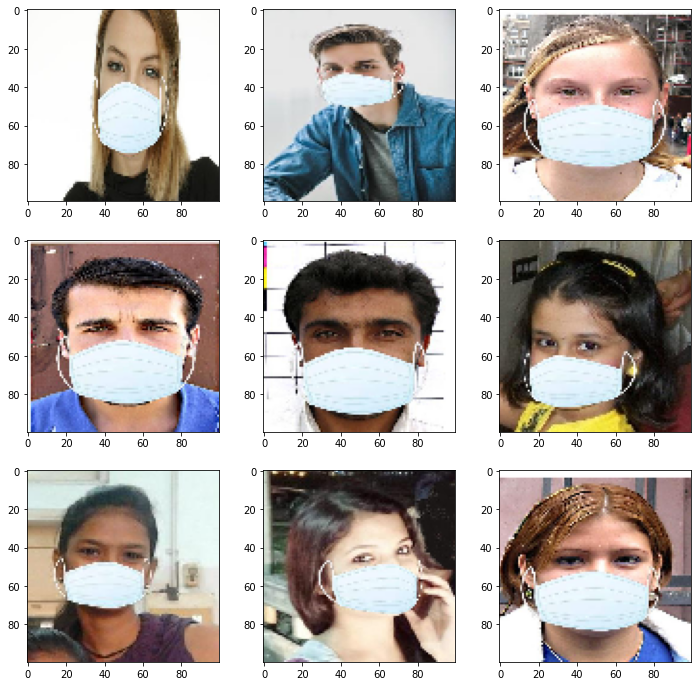

In [2]:
folder_path='D:/pds_project/mask_detection_dataset'
directory='/with_mask'
picture_size=100
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+directory+"/"+
                  os.listdir(folder_path + "/" + directory)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


In [3]:
CATEGORIES=['incorrect_mask','with_mask','without_mask']
#CATEGORIES=['with_mask','without_mask']
data=[]


for categories in CATEGORIES:
    path=os.path.join(folder_path,categories)
    labels=CATEGORIES.index(categories)
    for img in os.listdir(path):
        try:
            img_path=os.path.join(path,img)
            image=load_img(img_path,target_size=(224,224))
            image=img_to_array(image)
            data.append([image,labels])
        except Exception as e:
            pass
        
        


In [4]:
'''from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

lb=LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)'''
import random
random.shuffle(data)


In [5]:
x=[]
y=[]
for feature,label in data:
	x.append(feature)
	y.append(label)

x=np.array(x).reshape(-1,224,224,3)
y=np.array(y).reshape(-1,1)
x=x/225.0
#(trainX, testX, trainY, testY) = train_test_split(data, labels,
	#test_size=0.20, stratify=labels, random_state=42)

In [6]:
print(x.shape)
print(y.shape)

(1813, 224, 224, 3)
(1813, 1)


In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x,y,epochs=10,validation_split=0.3)

Epoch 1/10
40/40 [==============================] - 22s 221ms/step - loss: 1.5899 - accuracy: 0.6651 - val_loss: 0.4213 - val_accuracy: 0.8566
Epoch 2/10
40/40 [==============================] - 5s 120ms/step - loss: 0.3351 - accuracy: 0.8747 - val_loss: 0.3125 - val_accuracy: 0.8915
Epoch 3/10
40/40 [==============================] - 5s 114ms/step - loss: 0.2050 - accuracy: 0.9180 - val_loss: 0.1993 - val_accuracy: 0.9228
Epoch 4/10
40/40 [==============================] - 5s 114ms/step - loss: 0.1088 - accuracy: 0.9693 - val_loss: 0.1722 - val_accuracy: 0.9504
Epoch 5/10
40/40 [==============================] - 5s 118ms/step - loss: 0.0501 - accuracy: 0.9858 - val_loss: 0.1726 - val_accuracy: 0.9596
Epoch 6/10
40/40 [==============================] - 5s 117ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.1680 - val_accuracy: 0.9522
Epoch 7/10
40/40 [==============================] - 5s 118ms/step - loss: 0.0286 - accuracy: 0.9953 - val_loss: 0.1715 - val_accuracy: 0.9577
Epoch

In [10]:
model.save('masked_face_identifier.h5')

In [1]:
from tensorflow.keras.models import load_model
model=load_model(r"D:\pds_project\masked_face_identifier.h5")

In [5]:
test_image=load_img("D:/pds_project/mask_detection_dataset/incorrect_mask/aug_5.jpg",target_size=(224,224))
test_image=img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

[[ 9.561035 -5.464022 -4.143244]]


In [6]:
plt.plot(model.history['accuracy'], label='accuracy')
plt.plot(model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

TypeError: 'History' object is not subscriptable